In [3]:
pip install pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
import os
import json
import pandas as pd
from datetime import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np

def millions(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

path_to_json = '/Users/glopezleal/tmp/contratacion-estado-json/dump/licitaciones'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

df = pd.DataFrame(columns=['id', 'summary', 'title', 'updated', 'money', 'moneyOverall', 'payableAmount', 'status', 'ts'])

for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)

        summary = json_text['summary']['#text']
        if "Junta de Gobierno del Ayuntamiento de Aranda de Duero" not in summary and \
           "Alcaldía del Ayuntamiento de Aranda de Duero" not in summary and \
           "Pleno del Ayuntamiento de Aranda de Duero" not in summary:
            continue;

        id = json_text['cac-place-ext:ContractFolderStatus']['cbc:ContractFolderID']
        updated = pd.to_datetime(datetime.fromisoformat(json_text['updated']), utc=True)
        title = json_text['title']
        status = summary[len(summary) - 4:len(summary)].replace(":", "").strip()
        ts = updated.strftime('%Y') + updated.strftime('%m')
        money = json_text['cac-place-ext:ContractFolderStatus']['cac:ProcurementProject']['cac:BudgetAmount']['cbc:TotalAmount']['#text']
        moneyOverall = -1
        payableAmount = -1
        try:
            moneyOverall = json_text['cac-place-ext:ContractFolderStatus']['cac:ProcurementProject']['cac:BudgetAmount']['cbc:EstimatedOverallContractAmount']['#text']
            payableAmount = json_text['cac-place-ext:ContractFolderStatus']['cac:TenderResult']['cac:AwardedTenderedProject']['cac:LegalMonetaryTotal']['cbc:PayableAmount']['#text']
        except:
            print(id, js)

        #print(id, status)
        df.loc[id + "" + updated.isoformat()] = [id, summary, title, updated, money, moneyOverall, payableAmount, status, ts]

print(df.shape)


ABR/SERV/2022000017 11279257-1664776966098.json
2022/00002645x 11174862-1663148879706.json
ABR/SERV/2022000017 11279257-1664707060786.json
250/17 1768671-1508402987301.json
881/16 1346915-1479376923447.json
ABR/SUMIN/2022000038 11596141-1669805475950.json
654/2019 3652062-1559216980236.json
811/16 1186765-1481536311378.json
105/15 929396-1436869613570.json
73/2019 3406938-1559732596280.json
2020/00004992k 6216753-1596625056526.json
1891/17 1787397-1510054813604.json
ABR/SERV/2022000027 11533280-1674037843785.json
ABR/CON_SERV/2022000015 11319655-1666780248718.json
2021/00002245y 7898762-1626437038360.json
ABR/CON_SERV/2022000015 11319655-1665559968138.json
2148/18 2981476-1550480113025.json
ABR/SERV/2022000010 11081561-1662023470152.json
2021/00007668r 8378745-1632918420081.json
ABR/OBR/2022000035 11571213-1668625606676.json
2022/00005734v 10309164-1654581848107.json
1603/18 2377055-1542113469509.json
ABR/SUMIN/2022000002 10805165-1658142442794.json
2378/2019 4197496-1572271400012.json

976/17 1787351-1509459179322.json
2021/00002084y 7281678-1617956484079.json
1204/18 2307968-1532427259480.json
2021/00011258t 9150979-1655807152041.json
293/16 1009393-1464762552662.json
ABR/SERV/2022000016 11269182-1664537428896.json
2021/00001427q 8108047-1628579200859.json
544/17 1572598-1496037954021.json
1891/17 1787397-1517562821808.json
ABR/SUMIN/2022000043 11693102-1670402980311.json
2021/00001427q 8108047-1628520422853.json
2022/00002219k 9690948-1653041966991.json
684/18 2383788-1531220837528.json
1232/17 1794267-1511339313804.json
15/16 1007750-1474287528424.json
ABR/OBR/2022000030 11476751-1668686129320.json
2021/00005111c 8340822-1633692905057.json
2148/18 2981476-1557484573641.json
ABR/SUMIN/2022000037 11586654-1671401059241.json
344/15 1007747-1465821692760.json
1034/16 1278281-1473841132671.json
ABR/OBR/2022000022 11386947-1666695154807.json
2020/00005384e 6259479-1597740153570.json
ABR/SERV/2022000014 11102062-1662376500943.json
ABR/SUMIN/2022000037 11586654-1668769507

293/16 1009393-1468404413454.json
ABR/SERV/2022000027 11533280-1668173660891.json
151/16 1007341-1467371633406.json
ABR/OBR/2022000030 11476751-1668165079591.json
ABR/SUMIN/2022000036 11570968-1668685240286.json
2021/00010103H 8594746-1642585960406.json
(997, 9)


In [447]:
#df = df.sort_values(by=["updated"], ascending=False)
#df_res = df[df.status.eq("RES")].groupby(by=[df.updated.dt.year, df.updated.dt.month])
#df_res_by_year = df[df.status.eq("RES")].groupby(by=[df.updated.dt.year])
#df_adj = df[df.status.eq("ADJ")].groupby(by=[df.updated.dt.year, df.updated.dt.month])
#df_adj_by_year = df[df.status.eq("EV")].groupby(by=[df.updated.dt.year])
#df_pub_by_year = df[df.status.eq("PUB")].groupby(by=[df.updated.dt.year])
#df_adj = df_adj.drop_duplicates(subset=["id"])

#df_all = df[df.status.eq("RES")].drop_duplicates(subset=["id"]).groupby(by=[df.updated.dt.year, df.updated.dt.month])
#df_all_year = df[df.status.eq("RES")].drop_duplicates(subset=["id"]).groupby(by=[df.updated.dt.year])


In [5]:
#df_grouped_by_year = df.groupby(by=[df.updated.dt.year])

In [21]:
df_res = df[df.status.eq("RES")]
df_pub = df[df.status.eq("PUB")]

df_res_ids = set(df_res.id)
df_pub_ids = set(df_pub.id)

# Resueltos
df_res_dedup = df_res.sort_values(by='updated').drop_duplicates(subset='id', keep='first')#.sort_values(by=['moneyOverall'], ascending=False)
money_res = df_res_dedup['moneyOverall'].sum()
df_res_dedup_grouped = df_res_dedup.groupby(by=[df_res_dedup.updated.dt.year])#, df_res_dedup.updated.dt.month])

# Publicados NO en resueltos (aún pendientes)
ids_in_pub_not_in_res = df_pub_ids.difference(df_res_ids)
df_pub_not_res_dedup = df_pub[df_pub['id'].isin(ids_in_pub_not_in_res)].sort_values(by='updated').drop_duplicates(subset='id', keep='first')#.sort_values(by=['moneyOverall'], ascending=False)
money_pub = df_pub_not_res_dedup['moneyOverall'].sum()
df_pub_not_res_dedup_grouped = df_pub_not_res_dedup.groupby(by=[df_pub_not_res_dedup.updated.dt.year])#, df_pub_not_res_dedup.updated.dt.month])

print("money_res=", money_res)
print("money_pub=", money_pub)

merged_df = pd.concat([df_res_dedup, df_pub_not_res_dedup], axis=0).sort_values(by=['money'], ascending=False)
merged_df


#df_res_dedup.head(1000)

#df_pub_not_res_dedup.head(1000)

money_res= 120423393.3
money_pub= 41086195.69


,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
ABR/CON_SERV/20220000152022-10-09T07:39:40.230000+00:00,ABR/CON_SERV/2022000015,Id licitación: ABR/CON_SERV/2022000015; Órgano...,Contratación de Los Servicios de Limpieza Viar...,2022-10-09 07:39:40.230000+00:00,3750054.41,37500544.10,-1.00,PUB,202210
ABR/OBR/20220000012022-12-16T08:42:05.363000+00:00,ABR/OBR/2022000001,Id licitación: ABR/OBR/2022000001; Órgano de C...,Contrato de obras para la reforma de la Piscin...,2022-12-16 08:42:05.363000+00:00,3389980.92,2801637.12,2734721.71,RES,202212
ABR/OBR/20220000222022-10-20T09:33:22.843000+00:00,ABR/OBR/2022000022,Id licitación: ABR/OBR/2022000022; Órgano de C...,Contrato de obras reforma del entorno de Jardi...,2022-10-20 09:33:22.843000+00:00,2948195.70,2436525.37,-1.00,PUB,202210
209/142014-12-12T08:22:19.988000+00:00,209/14,Id licitación: 209/14; Órgano de Contratación:...,Gestión del Servicio Público Municipal de tran...,2014-12-12 08:22:19.988000+00:00,2925472.11,3989280.15,21.98,RES,201412
2021/00011332m2022-12-30T12:36:37.767000+00:00,2021/00011332m,Id licitación: 2021/00011332m; Órgano de Contr...,contratación del servicio de atención domicili...,2022-12-30 12:36:37.767000+00:00,2558593.44,4994172.00,2458856.00,RES,202212
...,...,...,...,...,...,...,...,...,...
2019/00001196w2020-02-14T10:52:55.361000+00:00,2019/00001196w,Id licitación: 2019/00001196w; Órgano de Contr...,servicio para la transcripción literal de las ...,2020-02-14 10:52:55.361000+00:00,1.21,11808.00,6592.80,RES,202002
104/152015-04-20T12:21:26.436000+00:00,104/15,Id licitación: 104/15; Órgano de Contratación:...,"Gestión, coordinación y organización del merca...",2015-04-20 12:21:26.436000+00:00,0.00,30000.00,0.00,RES,201504
818/132013-11-18T09:27:00.656000+00:00,818/13,Id licitación: 818/13; Órgano de Contratación:...,Otorgamiento de una autorización de ocupación ...,2013-11-18 09:27:00.656000+00:00,0.00,3800.00,1367.00,RES,201311
675/132013-07-08T10:29:45.764000+00:00,675/13,Id licitación: 675/13; Órgano de Contratación:...,"Gestión, Organización y Explotación de los Fes...",2013-07-08 10:29:45.764000+00:00,0.00,357070.00,-1.00,RES,201307


In [23]:
df_pub[df_pub.id.duplicated()]
df_pub_dedup = df_pub.sort_values(by='updated').drop_duplicates(subset="id")

merged_df[merged_df.updated.dt.year == 2021].sort_values(by=["moneyOverall"], ascending=False).head(5)

,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
2021/00002142H2021-11-02T13:04:08.643000+00:00,2021/00002142H,Id licitación: 2021/00002142H; Órgano de Contr...,"Servicio de conservación, mantenimiento y mejo...",2021-11-02 13:04:08.643000+00:00,1453559.38,4939878.96,1443038.61,RES,202111
2021/00001427q2021-11-18T10:28:49.479000+00:00,2021/00001427q,Id licitación: 2021/00001427q; Órgano de Cont...,contratación de las obras de reurbanización de...,2021-11-18 10:28:49.479000+00:00,2100203.12,1735705.06,1456700.89,RES,202111
2021/00003781r2021-09-03T09:25:18.445000+00:00,2021/00003781r,Id licitación: 2021/00003781r; Órgano de Contr...,obras de renovación de la urbanización de la a...,2021-09-03 09:25:18.445000+00:00,815658.87,674098.24,478340.00,RES,202109
2021/00008162n2021-11-05T13:37:57.288000+00:00,2021/00008162n,Id licitación: 2021/00008162n; Órgano de Cont...,contrato de obras de renovación de asfaltado d...,2021-11-05 13:37:57.288000+00:00,799997.56,661155.01,-1.00,RES,202111
2021/00006395q2021-09-24T09:57:38.475000+00:00,2021/00006395q,Id licitación: 2021/00006395q; Órgano de Contr...,obras de mejora de la eficiencia energética de...,2021-09-24 09:57:38.475000+00:00,559680.43,462545.81,438724.70,RES,202109


In [24]:
merged_df[merged_df.updated.dt.year == 2022][merged_df.status.eq('PUB')]

/var/folders/w8/x330cl_j28vd0rcp4wb_gh100000gq/T/ipykernel_81534/332831713.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  merged_df[merged_df.updated.dt.year == 2022][merged_df.status.eq('PUB')]


,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
ABR/CON_SERV/20220000152022-10-09T07:39:40.230000+00:00,ABR/CON_SERV/2022000015,Id licitación: ABR/CON_SERV/2022000015; Órgano...,Contratación de Los Servicios de Limpieza Viar...,2022-10-09 07:39:40.230000+00:00,3750054.41,37500544.10,-1.0,PUB,202210
ABR/OBR/20220000222022-10-20T09:33:22.843000+00:00,ABR/OBR/2022000022,Id licitación: ABR/OBR/2022000022; Órgano de C...,Contrato de obras reforma del entorno de Jardi...,2022-10-20 09:33:22.843000+00:00,2948195.70,2436525.37,-1.0,PUB,202210
ABR/SERV/20220000172022-10-02T10:37:40.786000+00:00,ABR/SERV/2022000017,Id licitación: ABR/SERV/2022000017; Órgano de ...,Contrato de mantenimiento de las instalaciones...,2022-10-02 10:37:40.786000+00:00,338488.59,346633.94,-1.0,PUB,202210
2022/00001896c2022-05-27T08:09:07.859000+00:00,2022/00001896c,Id licitación: 2022/00001896c; Órgano de Contr...,alquiler y montaje de la iluminación ornamenta...,2022-05-27 08:09:07.859000+00:00,81154.70,134140.00,-1.0,PUB,202205
ABR/SERV/20220000232022-11-03T07:58:25.914000+00:00,ABR/SERV/2022000023,Id licitación: ABR/SERV/2022000023; Órgano de ...,Contrato del servicio de atención y gestión de...,2022-11-03 07:58:25.914000+00:00,71687.44,236983.28,-1.0,PUB,202211
ABR/SUMIN/20220000402022-11-24T20:50:49.770000+00:00,ABR/SUMIN/2022000040,Id licitación: ABR/SUMIN/2022000040; Órgano de...,Contratación del suministro de unos camerinos ...,2022-11-24 20:50:49.770000+00:00,69817.00,57700.00,-1.0,PUB,202211
ABR/SERV/20220000142022-09-05T11:15:00.943000+00:00,ABR/SERV/2022000014,Id licitación: ABR/SERV/2022000014; Órgano de ...,Expediente para la contratación del servicio p...,2022-09-05 11:15:00.943000+00:00,63989.64,54990.00,-1.0,PUB,202209
ABR/SERV/20220000272022-11-11T13:34:20.891000+00:00,ABR/SERV/2022000027,Id licitación: ABR/SERV/2022000027; Órgano de ...,Contratación del servicio y suministro de trab...,2022-11-11 13:34:20.891000+00:00,22331.83,74400.00,-1.0,PUB,202211
ABR/SUMIN/20220000432022-12-05T13:17:48.248000+00:00,ABR/SUMIN/2022000043,Id licitación: ABR/SUMIN/2022000043; Órgano de...,Contrato mixto de suministro y servicio de ins...,2022-12-05 13:17:48.248000+00:00,4969.77,16429.00,-1.0,PUB,202212


In [25]:
max_money_by_year = df_grouped_by_year['moneyOverall'].max()
for year, max_money in max_money_by_year.items():
    print(f"Year: {year}, Maximum moneyOverall: {max_money}")

NameError: name 'df_grouped_by_year' is not defined

In [291]:
df_grouped_by_year.head(10000)

,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
ABR/SUMIN/20220000432023-01-27T09:44:54.123000+00:00,ABR/SUMIN/2022000043,Id licitación: ABR/SUMIN/2022000043; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Duero; Importe: 4107.25 EUR; Estado: ADJ,"Contrato mixto de suministro y servicio de instalación y mantenimiento integral de desfibriladores externos semiautomáticos (DESA) en régimen de renting, a ubicar en dependencias del Ayuntamiento de Aranda de Duero",2023-01-27 09:44:54.123000+00:00,4969.77,16429.00,4823.06,ADJ,202301
ABR/SUMIN/20220000432023-01-27T09:34:56.165000+00:00,ABR/SUMIN/2022000043,Id licitación: ABR/SUMIN/2022000043; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Duero; Importe: 4107.25 EUR; Estado: ADJ,"Contrato mixto de suministro y servicio de instalación y mantenimiento integral de desfibriladores externos semiautomáticos (DESA) en régimen de renting, a ubicar en dependencias del Ayuntamiento de Aranda de Duero",2023-01-27 09:34:56.165000+00:00,4969.77,16429.00,4823.06,ADJ,202301
ABR/SERV/20220000272023-01-19T12:45:32.209000+00:00,ABR/SERV/2022000027,Id licitación: ABR/SERV/2022000027; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Duero; Importe: 18600 EUR; Estado: EV,Contratación del servicio y suministro de trabajos de imprenta para la divulgación de las actividades de las concejalías de Juventud y Festejos durante los años 2023 y 2024.,2023-01-19 12:45:32.209000+00:00,22331.83,74400.00,-1.00,EV,202301
ABR/SERV/20220000282023-01-19T12:12:22.577000+00:00,ABR/SERV/2022000028,Id licitación: ABR/SERV/2022000028; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Duero; Importe: 9090.91 EUR; Estado: RES,Servicio de utilización de una plataforma digital para la obtención de certificados electrónicos del personal y servidores del Ayuntamiento de Aranda de Duero,2023-01-19 12:12:22.577000+00:00,11000.00,9090.91,4827.90,RES,202301
ABR/OBR/20220000352023-01-18T14:25:03.024000+00:00,ABR/OBR/2022000035,Id licitación: ABR/OBR/2022000035; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Duero; Importe: 280823.84 EUR; Estado: RES,Obras de reparación del puente Nuevo en Aranda de Duero,2023-01-18 14:25:03.024000+00:00,339796.85,280823.84,308684.47,RES,202301
...,...,...,...,...,...,...,...,...,...
1375/112012-05-04T09:01:44.180000+00:00,1375/11,Id licitación: 1375/11; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Aranda de Duero; Importe: 162288.14 EUR; Estado: RES,"Servicio municipal de comida de personas mayores y/o dependientes del Ayuntamiento de Aranda de Duero: en el comedor del Centro de Día, sede del Club Municipal de Jubilados del Polígono Residencial y a Domicilio, así como el Servicio de cafetería del Centro de Día de Santa Catalina y los Clubes Municipales de Jubilados del ""Polígono Residencial"" y ""Virgen Viñas"", así como ""Otros Servicios"".",2012-05-04 09:01:44.180000+00:00,191500.00,383000.00,191500.00,RES,201205
1277/112012-02-08T12:28:52.920000+00:00,1277/11,Id licitación: 1277/11; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Aranda de Duero; Importe: 101568.35 EUR; Estado: RES,"Suministro de material para el cambio de luminarias a bajo consumo, reposición de cable y disminución de consumo.",2012-02-08 12:28:52.920000+00:00,119850.65,-1.00,-1.00,RES,201202
1141/112012-01-18T08:05:52.654000+00:00,1141/11,Id licitación: 1141/11; Órgano de Contratación: Pleno del Ayuntamiento de Aranda de Duero; Importe: 599830.5 EUR; Estado: RES,Servicio de asistencia técnica para la revisión y adaptación del Plan General de Ordenación Urbana de Aranda de Duero (Burgos),2012-01-18 08:05:52.654000+00:00,707800.00,599830.50,441650.00,RES,201201
1158/112012-01-17T11:37:09.160000+00:00,1158/11,Id licitación: 1158/11; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Aranda de Duero; Importe: 65000 EUR; Estado: RES,Suministro de material para alumbrado público del carril bici de Ara

In [26]:
df_res_dedup[df_res_dedup.updated.dt.year == 2012]

,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
1270/112012-01-04T09:00:34.517000+00:00,1270/11,Id licitación: 1270/11; Órgano de Contratación...,Servicio de recogida de perros vagabundos en e...,2012-01-04 09:00:34.517000+00:00,18000.00,72000.00,18000.00,RES,201201
1158/112012-01-17T11:37:09.160000+00:00,1158/11,Id licitación: 1158/11; Órgano de Contratación...,Suministro de material para alumbrado público ...,2012-01-17 11:37:09.160000+00:00,76700.00,-1.00,-1.00,RES,201201
1141/112012-01-18T08:05:52.654000+00:00,1141/11,Id licitación: 1141/11; Órgano de Contratación...,Servicio de asistencia técnica para la revisió...,2012-01-18 08:05:52.654000+00:00,707800.00,599830.50,441650.00,RES,201201
1277/112012-02-08T12:28:52.920000+00:00,1277/11,Id licitación: 1277/11; Órgano de Contratación...,Suministro de material para el cambio de lumin...,2012-02-08 12:28:52.920000+00:00,119850.65,-1.00,-1.00,RES,201202
1375/112012-05-04T09:01:44.180000+00:00,1375/11,Id licitación: 1375/11; Órgano de Contratación...,Servicio municipal de comida de personas mayor...,2012-05-04 09:01:44.180000+00:00,191500.00,383000.00,191500.00,RES,201205
1325/112012-08-08T08:08:26.736000+00:00,1325/11,Id licitación: 1325/11; Órgano de Contratación...,Servicio de podología en el Centro de Día de S...,2012-08-08 08:08:26.736000+00:00,800.00,1600.00,800.00,RES,201208
658/122012-10-03T08:53:01.497000+00:00,658/12,Id licitación: 658/12; Órgano de Contratación:...,"Gestión, organización y dinamización de las lu...",2012-10-03 08:53:01.497000+00:00,27118.64,54237.28,23950.00,RES,201210
74/122012-10-04T10:31:46.881000+00:00,74/12,Id licitación: 74/12; Órgano de Contratación: ...,Edición de los programas y carteles de las Fie...,2012-10-04 10:31:46.881000+00:00,5310.00,18000.00,4720.00,RES,201210
622/122012-10-08T13:22:40.146000+00:00,622/12,Id licitación: 622/12; Órgano de Contratación:...,Servicio de asistencia técnica para la redacci...,2012-10-08 13:22:40.146000+00:00,120817.29,99849.00,102694.69,RES,201210
674/122012-10-11T11:06:43.441000+00:00,674/12,Id licitación: 674/12; Órgano de Contratación:...,Instalación de luces ornamentales durante las ...,2012-10-11 11:06:43.441000+00:00,47259.00,40050.00,47259.00,RES,201210


In [444]:
merged_df = pd.concat([df_res_dedup, df_pub_not_res_dedup], axis=0)
merged_df.tail(10)

,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
ABR/SUMIN/20220000402022-12-01T10:52:29.519000+00:00,ABR/SUMIN/2022000040,Id licitación: ABR/SUMIN/2022000040; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda...,Contratación del suministro de unos camerinos y un escenario para conciertos y otros espectáculo...,2022-12-01 10:52:29.519000+00:00,69817.00,57700.00,-1.0,PUB,202212
ABR/OBR/20220000222022-11-17T09:37:16.987000+00:00,ABR/OBR/2022000022,Id licitación: ABR/OBR/2022000022; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda d...,Contrato de obras reforma del entorno de Jardines de don Diego en Aranda de Duero (Burgos),2022-11-17 09:37:16.987000+00:00,2948195.70,2436525.37,-1.0,PUB,202211
ABR/CON_SERV/20220000152022-11-07T09:47:20.189000+00:00,ABR/CON_SERV/2022000015,Id licitación: ABR/CON_SERV/2022000015; Órgano de Contratación: Pleno del Ayuntamiento de Aranda...,Contratación de Los Servicios de Limpieza Viaria y Recogida de Residuos Sólidos Urbanos del Ayun...,2022-11-07 09:47:20.189000+00:00,3750054.41,37500544.10,-1.0,PUB,202211
ABR/SERV/20220000232022-11-04T08:34:07.742000+00:00,ABR/SERV/2022000023,Id licitación: ABR/SERV/2022000023; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda ...,"Contrato del servicio de atención y gestión de visitantes en el museo de pintura ""Casa de las Bo...",2022-11-04 08:34:07.742000+00:00,71687.44,236983.28,-1.0,PUB,202211
ABR/SERV/20220000172022-10-25T08:56:41.938000+00:00,ABR/SERV/2022000017,Id licitación: ABR/SERV/2022000017; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda ...,Contrato de mantenimiento de las instalaciones de protección contra incendios de las dependencia...,2022-10-25 08:56:41.938000+00:00,338488.59,346633.94,-1.0,PUB,202210
ABR/SERV/20220000142022-09-15T11:45:43.991000+00:00,ABR/SERV/2022000014,Id licitación: ABR/SERV/2022000014; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda ...,Expediente para la contratación del servicio para realizar campaña de natación para los alumnos ...,2022-09-15 11:45:43.991000+00:00,63989.64,54990.00,-1.0,PUB,202209
2022/00001896c2022-05-27T08:09:07.859000+00:00,2022/00001896c,Id licitación: 2022/00001896c; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Du...,alquiler y montaje de la iluminación ornamental para las fiestas patronales 2022 y 2023 y navida...,2022-05-27 08:09:07.859000+00:00,81154.70,134140.00,-1.0,PUB,202205
2020/00005282l2020-10-19T15:13:09.096000+00:00,2020/00005282l,Id licitación: 2020/00005282l; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Ara...,alquiler iluminación ornamental navidad 2020/2021 y carnaval 2021,2020-10-19 15:13:09.096000+00:00,38381.20,0.00,-1.0,PUB,202010
570/20192019-03-27T10:18:25.705000+00:00,570/2019,Id licitación: 570/2019; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Aranda de...,"Contrato del servicio de asesoría, representación y defensa letrada del Ayuntamiento de Aranda d...",2019-03-27 10:18:25.705000+00:00,90750.00,225000.00,-1.0,PUB,201903
280/172017-06-01T10:20:38.149000+00:00,280/17,Id licitación: 280/17; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Duero; Imp...,"Concesión del uso privativo del kiosko-bar ""Virgen de las Viñas"" sito en la explanada de la ermi...",2017-06-01 10:20:38.149000+00:00,950.00,2850.00,-1.0,PUB,201706


<AxesSubplot: title={'center': 'Suma de € licitados por año/mes'}, xlabel='año/mes', ylabel='€'>

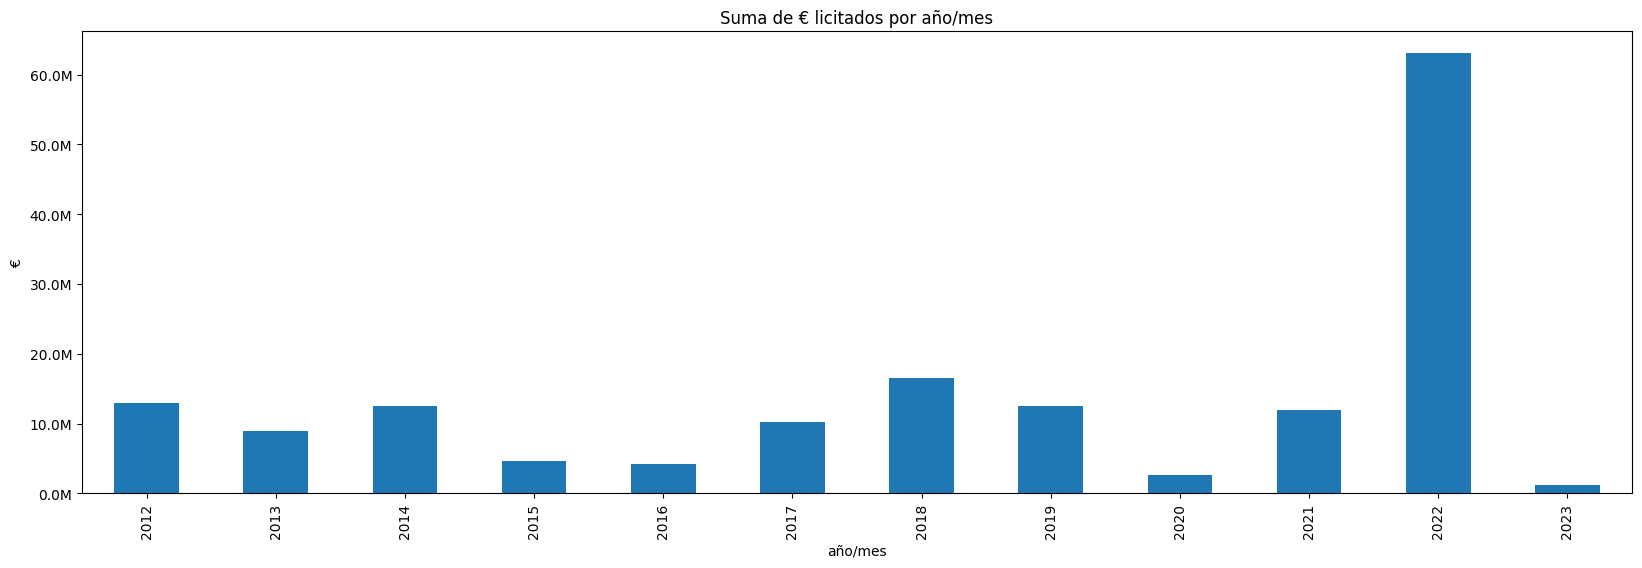

In [27]:
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

merged_df.groupby(by=[merged_df.updated.dt.year])['moneyOverall'].sum().plot(
    kind="bar",
    title="Suma de € licitados por año/mes",
    ylabel="€",
    xlabel="año/mes",
    figsize=(20,6)
)

In [28]:
merged_df.groupby(by=[merged_df.updated.dt.year])['moneyOverall'].sum()

updated
2012    13017306.18
2013     9017677.01
2014    12512101.79
2015     4630734.53
2016     4276636.76
2017    10178355.22
2018    16507886.97
2019    12517959.68
2020     2656239.47
2021    11925705.82
2022    63018585.45
2023     1250400.11
Name: moneyOverall, dtype: float64

In [438]:
merged_df[merged_df.updated.dt.year == 2012].sort_values(by=["money"], ascending=False).head(2)


,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
1141/112012-11-15T12:05:46.613000+00:00,1141/11,Id licitación: 1141/11; Órgano de Contratación: Pleno del Ayuntamiento de Aranda de Duero; Impor...,Servicio de asistencia técnica para la revisión y adaptación del Plan General de Ordenación Urba...,2012-11-15 12:05:46.613000+00:00,707800.0,599830.5,441650.0,RES,201211
1375/112012-10-04T08:25:50.831000+00:00,1375/11,Id licitación: 1375/11; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Aranda de ...,Servicio municipal de comida de personas mayores y/o dependientes del Ayuntamiento de Aranda de ...,2012-10-04 08:25:50.831000+00:00,191500.0,383000.0,191500.0,RES,201210


In [499]:
merged_df[merged_df.moneyOverall > 1000000].sort_values(by=["money"], ascending=False).head(200)

,id,summary,title,updated,money,moneyOverall,payableAmount,status,ts
ABR/CON_SERV/20220000152022-11-07T09:47:20.189000+00:00,ABR/CON_SERV/2022000015,Id licitación: ABR/CON_SERV/2022000015; Órgano de Contratación: Pleno del Ayuntamiento de Aranda...,Contratación de Los Servicios de Limpieza Viaria y Recogida de Residuos Sólidos Urbanos del Ayun...,2022-11-07 09:47:20.189000+00:00,3750054.41,37500544.10,-1.00,PUB,202211
ABR/OBR/20220000012022-12-16T08:42:05.363000+00:00,ABR/OBR/2022000001,Id licitación: ABR/OBR/2022000001; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda d...,Contrato de obras para la reforma de la Piscina Cubierta Municipal de Aranda de Duero,2022-12-16 08:42:05.363000+00:00,3389980.92,2801637.12,2734721.71,RES,202212
ABR/OBR/20220000222022-11-17T09:37:16.987000+00:00,ABR/OBR/2022000022,Id licitación: ABR/OBR/2022000022; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda d...,Contrato de obras reforma del entorno de Jardines de don Diego en Aranda de Duero (Burgos),2022-11-17 09:37:16.987000+00:00,2948195.70,2436525.37,-1.00,PUB,202211
209/142015-11-17T09:45:39.495000+00:00,209/14,Id licitación: 209/14; Órgano de Contratación: Pleno del Ayuntamiento de Aranda de Duero; Import...,Gestión del Servicio Público Municipal de transporte urbano colectivo de viajeros en el término ...,2015-11-17 09:45:39.495000+00:00,2925472.11,3989280.15,21.98,RES,201511
2021/00011332m2022-12-30T12:36:37.767000+00:00,2021/00011332m,Id licitación: 2021/00011332m; Órgano de Contratación: Pleno del Ayuntamiento de Aranda de Duero...,"contratación del servicio de atención domiciliaria del ayuntamiento de aranda de duero, burgos.",2022-12-30 12:36:37.767000+00:00,2558593.44,4994172.00,2458856.00,RES,202212
2021/00012064r2022-04-29T10:52:54.432000+00:00,2021/00012064r,Id licitación: 2021/00012064r; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de Du...,ejecución de las obras de construcción de una comisaría para la policía local en aranda de duero,2022-04-29 10:52:54.432000+00:00,2241231.30,1852257.27,1398104.04,RES,202204
2021/00001427q2022-11-10T10:31:11.960000+00:00,2021/00001427q,Id licitación: 2021/00001427q; Órgano de Contratación: Alcaldía del Ayuntamiento de Aranda de D...,"contratación de las obras de reurbanización de la avenida castilla, en el tramo comprendido entr...",2022-11-10 10:31:11.960000+00:00,2100203.12,1735705.06,1456700.89,RES,202211
1529/172018-10-22T10:53:15.996000+00:00,1529/17,Id licitación: 1529/17; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Aranda de ...,"Obras de reurbanización de las Calles Moratín, Juan Padilla, Juan Bravo y Francisco Maldonado (p...",2018-10-22 10:53:15.996000+00:00,1837387.31,1518501.91,1184563.60,RES,201810
461/132013-09-18T08:55:54.918000+00:00,461/13,Id licitación: 461/13; Órgano de Contratación: Junta de Gobierno del Ayuntamiento de Aranda de D...,Obras de reurbanización del Barrio de San Juan y varias calles adyacentes en Aranda de Duero,2013-09-18 08:55:54.918000+00:00,1629291.96,1346522.28,1050893.31,RES,201309
2021/00002142H2021-11-02T13:04:08.643000+00:00,2021/00002142H,Id licitación: 2021/00002142H; Órgano de Contratación: Pleno del Ayuntamiento de Aranda de Duero...,"Servicio de conservación, mantenimiento y mejora de las zonas verdes, elementos vegetales y área...",2021-11-02 13:04:08.643000+00:00,1453559.38,4939878.96,1443038.61,RES,202111


In [497]:
df_res['money'].sum().plot(
    kind="bar",
    title="Suma de € resueltos por año/mes",
    ylabel="€",
    xlabel="año/mes"
)

AttributeError: 'numpy.float64' object has no attribute 'plot'

In [ ]:

df_adj['money'].sum().plot(
    kind="bar",
    title="Suma de € adjudicados por año/mes",
    ylabel="€",
    xlabel="año/mes"
)

In [ ]:
df_adj['moneyOverall']

In [296]:
sns.lineplot(x=df_all.updated.dt.month,y='money',hue=df_all.updated.dt.year, data=df_all) 

NameError: name 'sns' is not defined

In [297]:
dates = df.set_index('updated').resample('M', fill_value=0).asfreq().index
dat

TypeError: DataFrame.resample() got an unexpected keyword argument 'fill_value'

In [482]:
formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.yaxis.set_major_formatter(formatter)

df_all[(df_all.moneyOverall > 1000000.0)].sum().plot(
    kind="bar",
    title="Suma de € por año/mes. Licitaciones > 1M €",
    ylabel="€",
    xlabel="año/mes",
    figsize=(20,4)
)

SyntaxError: invalid syntax (2089154938.py, line 6)